# Step 2: Private Prediction using Syft Keras - Serving (Client)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tf_encrypted as tfe

from tensorflow.keras.datasets import mnist

## Protocol

In [2]:
config = tfe.RemoteConfig.load("/tmp/tfe.config")

tfe.set_config(config)
tfe.set_protocol(tfe.protocol.Pond())

## Data

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Running

In [4]:
input_shape = (1, 28, 28, 1)
output_shape = (1, 10)

In [5]:
client = tfe.serving.QueueClient(
    input_shape=input_shape,
    output_shape=output_shape)

In [6]:
sess = tfe.Session(config=config)

INFO:tf_encrypted:Starting session on target 'grpc://localhost:4000' using config graph_options {
}



In [7]:
# User inputs
num_tests = 3
images, expected_labels = x_test[:num_tests], y_test[:num_tests]

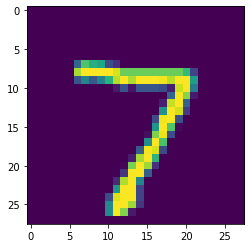

The image had label 7 and was correctly classified as 7


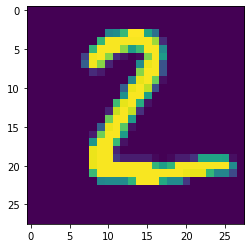

The image had label 2 and was correctly classified as 2


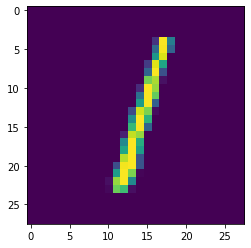

The image had label 1 and was correctly classified as 1


In [8]:
for image, expected_label in zip(images, expected_labels):

    plt.imshow(image[:,:,0])
    plt.show()

    res = client.run(sess, image.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(res)

    print("The image had label {} and was {} classified as {}".format(
        expected_label,
        "correctly" if expected_label == predicted_label else "wrongly",
        predicted_label))